# Mod 5 Project Submission
- Student Name: Juliette Cabrera
- Student pace: Part-Time
- Scheduled project review date/time: 
- Instructor name: Matt Sparr
- Blog post URL: 

# The Question:
- The objective is to use the 2006-2007 school report to build a model that can predict a passing or failing grade of a school and interpret the results to find the factors which influence the grade.

# The Process:
Supervised learning - Classification - allows us to tell if something belongs to one class, or the other.  In this particular project, we're doing a multiclass classification problem because we're determining if the school will get a passing or failing grade.

## Data Used:
- Used the 2006-2007 School Report from NYC OpenData 
- Used https://www.schooldigger.com/go/NY/search.aspx (found in **Webscrape** notebook) to webscrape to find additional features:
    - Enrollment totals
    - Teacher-Student Ratio
    - Percent students who have free/reduced lunch 

## Workflow:
- Data cleaning 
    - includes encoding categorical columns
- EDA (exploratory data analysis)
    - Data visualization
- Compare model performance:
    - KNN (K-Nearest Neighbor)     
    - Decision Tree
    - Random Forest
    - Gradient Boosting
    - Ada Boost
    - XGBoost
- Interpret the findings
- Test models with new data (2007 - 2008 School Report)

# 1. Import all the necessary libraries, data set, and define functions that will be needed.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from IPython.display import Image
from pydotplus import graph_from_dot_data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.decomposition import PCA

def print_metrics(labels, preds):
    print('Precision Score: {}'.format(precision_score(labels, preds, average='weighted', zero_division='warn')))
    print('Recall Score: {}'.format(recall_score(labels, preds, average='weighted')))
    print('Accuracy Score: {}'.format(accuracy_score(labels, preds)))
    print('F1 Score: {}'.format(f1_score(labels, preds, average='weighted')))

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 2. Data Cleaning

In [2]:
school_report = pd.read_csv('clean_data.csv')
school_report.head(17)

,Unnamed: 0,SCHOOL,SCHOOL LEVEL*,PEER INDEX*,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE,Enrollment,Student-Teacher Ratio,Free-Reduced Lunch
0,0,BARD HIGH SCHOOL EARLY COLLEGE,High School,3.77,B,57.80,0.715,0.607,0.524,0.00,Well-Developed,589,17.3,43.5
1,1,CHILDREN'S WORKSHOP SCHOOL,Elementary School,39.10,B,56.81,0.508,0.462,0.615,1.50,Proficient,318,16.7,45.3
2,2,EARTH SCHOOL,Elementary School,41.67,B,55.18,0.985,0.446,0.492,0.00,Well-Developed,349,12.0,52.4
3,3,EAST SIDE COMMUNITY HIGH SCHOOL,High School,2.66,A,71.33,0.788,0.640,0.624,6.00,Well-Developed,678,13.8,65.3
4,4,MARTA VALLE SECONDARY SCHOOL,High School,2.63,C,36.00,0.250,0.387,0.375,0.00,Undeveloped,149,12.4,93.3
5,5,MARTA VALLE SECONDARY SCHOOL,Middle School,2.89,D,34.90,0.297,0.513,0.274,0.00,Undeveloped,303,13.7,43.9
6,6,NEIGHBORHOOD SCHOOL,Elementary School,37.76,B,53.08,0.821,0.429,0.507,0.00,Proficient,1729,18.7,23.5
7,7,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",High School,3.62,A,84.74,0.611,1.021,0.817,0.00,Undeveloped,201,11.1,82.6
8,8,PS 015 ROBERTO CLEMENTE,Elementary School,75.60,B,52.31,0.278,0.231,0.694,3.00,Undeveloped,379,14.5,61.5
9,9,PS 019 ASHER LEVY,Elementary School,59.25,B,51.24,0.510,0.466,0.511,1.50,Proficient,293,9.1,91.1


#### Rename columns:
- Fix columns names that are in a different format

In [3]:
school_report.rename(columns = {' PEER INDEX* ': 'PEER INDEX'}, inplace=True)
school_report.rename(columns = {'SCHOOL LEVEL*': 'SCHOOL LEVEL'}, inplace=True)

#### Encode columns:
- Encode categorical columns in order to clean and normalize the raw dataset.

In [4]:
school_report['SCHOOL LEVEL'] = school_report['SCHOOL LEVEL'].map({'Elementary School': 0,
                                                                    'K-8 School': 1, 'Middle School': 2,
                                                                    'High School': 3, 'Transfer School': 4})
school_report['GRADE'] = school_report['GRADE'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4})
school_report['QUALITY REVIEW SCORE'] = school_report['QUALITY REVIEW SCORE'].map({'Undeveloped': 0, 'Well-Developed': 1, 'Proficient': 2})

#### Drop unneccessary columns

In [5]:
school_report.drop(['Unnamed: 0', 'SCHOOL'],  axis=1, inplace=True)

#### Check the ```.info()```
- ```df.info()``` shows that there is no missing values, but it shows that PEER INDEX and Enrollment have object types.

In [6]:
school_report.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 12 columns):
SCHOOL LEVEL                  1044 non-null int64
PEER INDEX                    1044 non-null object
GRADE                         1044 non-null int64
OVERALL SCORE                 1044 non-null float64
ENVIRONMENT CATEGORY SCORE    1044 non-null float64
PERFORMANCE CATEGORY SCORE    1044 non-null float64
PROGRESS CATEGORY SCORE       1044 non-null float64
ADDITIONAL CREDIT             1044 non-null float64
QUALITY REVIEW SCORE          1044 non-null int64
Enrollment                    1044 non-null object
Student-Teacher Ratio         1044 non-null float64
Free-Reduced Lunch            1044 non-null float64
dtypes: float64(7), int64(3), object(2)
memory usage: 98.0+ KB


#### Check ```.describe()``` 
- In the process of checking describe, notice that PEER INDEX and Enrollment do not show, because they are considered 'objects', even though they are numbers.  
- Check their individual columns describe.

In [7]:
display(school_report.describe()) 
display(school_report['PEER INDEX'].describe())
display(school_report['Enrollment'].describe())

,SCHOOL LEVEL,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE,Student-Teacher Ratio,Free-Reduced Lunch
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.00000,1044.000000,1044.000000,1044.000000,1044.000000
mean,1.070881,1.230843,55.101374,0.512489,0.564418,0.50880,2.496648,1.484674,14.074330,76.083429
std,1.234202,1.006864,13.826718,0.179826,0.183776,0.17774,2.601808,0.612083,2.697126,21.016228
min,0.000000,0.000000,8.154000,-0.084000,-0.109000,-0.25200,0.000000,0.000000,4.700000,5.600000
25%,0.000000,1.000000,45.760000,0.383000,0.440000,0.39600,0.000000,1.000000,12.375000,69.300000
50%,0.000000,1.000000,55.185000,0.505500,0.567000,0.51400,1.500000,2.000000,14.100000,82.300000
75%,2.000000,2.000000,64.395000,0.646000,0.682000,0.62325,3.750000,2.000000,15.625000,91.300000
max,4.000000,4.000000,104.400000,1.035000,1.135000,1.14800,12.000000,2.000000,24.100000,100.000000


count     1044
unique     735
top        NA 
freq        13
Name: PEER INDEX, dtype: object

count     1044
unique     680
top        496
freq         6
Name: Enrollment, dtype: object

#### Making changes:
- Through ```df['column'].describe()```, notice that the top is NA, in the data, the dataset was not put in 'NaN', instead it is a string, and since it's label as type object, it does not show as missing.
    - Replace all NA's with NaN 
- Enrollment has numbers as well, but it has commas, therefore, need to get rid of the commas, to make them integers.

In [8]:
school_report['PEER INDEX'].replace(' NA ', np.nan, inplace=True)

In [9]:
school_report['Enrollment'] = school_report['Enrollment'].map(lambda x: x.replace(',', ''))

#### Change types to their appropriate types:
- PEER INDEX are floats
- Enrollment are integers

In [10]:
school_report['PEER INDEX'] = school_report['PEER INDEX'].astype(float)
school_report['Enrollment'] = school_report['Enrollment'].astype(int)

#### Fill in the missing values in PEER INDEX with the mean.

In [11]:
school_report['PEER INDEX'].fillna(value=school_report['PEER INDEX'].mean(), inplace=True)

In [12]:
display(school_report.info())
display(school_report.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 12 columns):
SCHOOL LEVEL                  1044 non-null int64
PEER INDEX                    1044 non-null float64
GRADE                         1044 non-null int64
OVERALL SCORE                 1044 non-null float64
ENVIRONMENT CATEGORY SCORE    1044 non-null float64
PERFORMANCE CATEGORY SCORE    1044 non-null float64
PROGRESS CATEGORY SCORE       1044 non-null float64
ADDITIONAL CREDIT             1044 non-null float64
QUALITY REVIEW SCORE          1044 non-null int64
Enrollment                    1044 non-null int64
Student-Teacher Ratio         1044 non-null float64
Free-Reduced Lunch            1044 non-null float64
dtypes: float64(8), int64(4)
memory usage: 98.0 KB


None

,SCHOOL LEVEL,PEER INDEX,GRADE,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE,Enrollment,Student-Teacher Ratio,Free-Reduced Lunch
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.00000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,1.070881,37.301038,1.230843,55.101374,0.512489,0.564418,0.50880,2.496648,1.484674,712.674330,14.074330,76.083429
std,1.234202,31.166913,1.006864,13.826718,0.179826,0.183776,0.17774,2.601808,0.612083,562.876438,2.697126,21.016228
min,0.000000,1.720000,0.000000,8.154000,-0.084000,-0.109000,-0.25200,0.000000,0.000000,62.000000,4.700000,5.600000
25%,0.000000,3.170000,1.000000,45.760000,0.383000,0.440000,0.39600,0.000000,1.000000,393.000000,12.375000,69.300000
50%,0.000000,37.565000,1.000000,55.185000,0.505500,0.567000,0.51400,1.500000,2.000000,569.500000,14.100000,82.300000
75%,2.000000,70.370000,2.000000,64.395000,0.646000,0.682000,0.62325,3.750000,2.000000,862.500000,15.625000,91.300000
max,4.000000,85.510000,4.000000,104.400000,1.035000,1.135000,1.14800,12.000000,2.000000,5839.000000,24.100000,100.000000


#### Pass/Fail Classification
- Separating the GRADE column between a passing grade and failing grade and making a column in the dataset.
    - A passing grade is a grade of A or B, depicted as a 1.
    - A failing grade is a grade of C, D, or F depicted as a 0.

In [13]:
def grade(x):
    if x == 0:
        return 1
    if x == 1:
        return 1
    else:
        return 0
    
school_report['Pass/Fail'] = school_report['GRADE'].apply(grade)

#### Rename columns:
- Change the target (Pass/Fail) column to target for train/test split for later.

#### Drop columns:
- Drop the GRADE column.
    - The GRADE column needs to drop because the pass/fail column is based off of the grade column and will make the models inaccurate, because the only important feature would be GRADE because it is based off of it.

In [14]:
school_report.rename(columns = {'Pass/Fail':'target'}, inplace = True) 
school_report.drop(['GRADE'], axis=1, inplace=True)

In [15]:
school_report.head()

,SCHOOL LEVEL,PEER INDEX,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE,Enrollment,Student-Teacher Ratio,Free-Reduced Lunch,target
0,3,3.77,57.80,0.715,0.607,0.524,0.0,1,589,17.3,43.5,1
1,0,39.10,56.81,0.508,0.462,0.615,1.5,2,318,16.7,45.3,1
2,0,41.67,55.18,0.985,0.446,0.492,0.0,1,349,12.0,52.4,1
3,3,2.66,71.33,0.788,0.640,0.624,6.0,1,678,13.8,65.3,1
4,3,2.63,36.00,0.250,0.387,0.375,0.0,0,149,12.4,93.3,0


# EDA: Visualize the Data

#### Checking the distribution of the dataset.
- Clearly see that Quality Review Score, School Level and our tagert are categorical.
- Additional Credit and Enrollment are positively skewed while Free-Reduced Lunch is negatively skewed.
- All other features look normal.

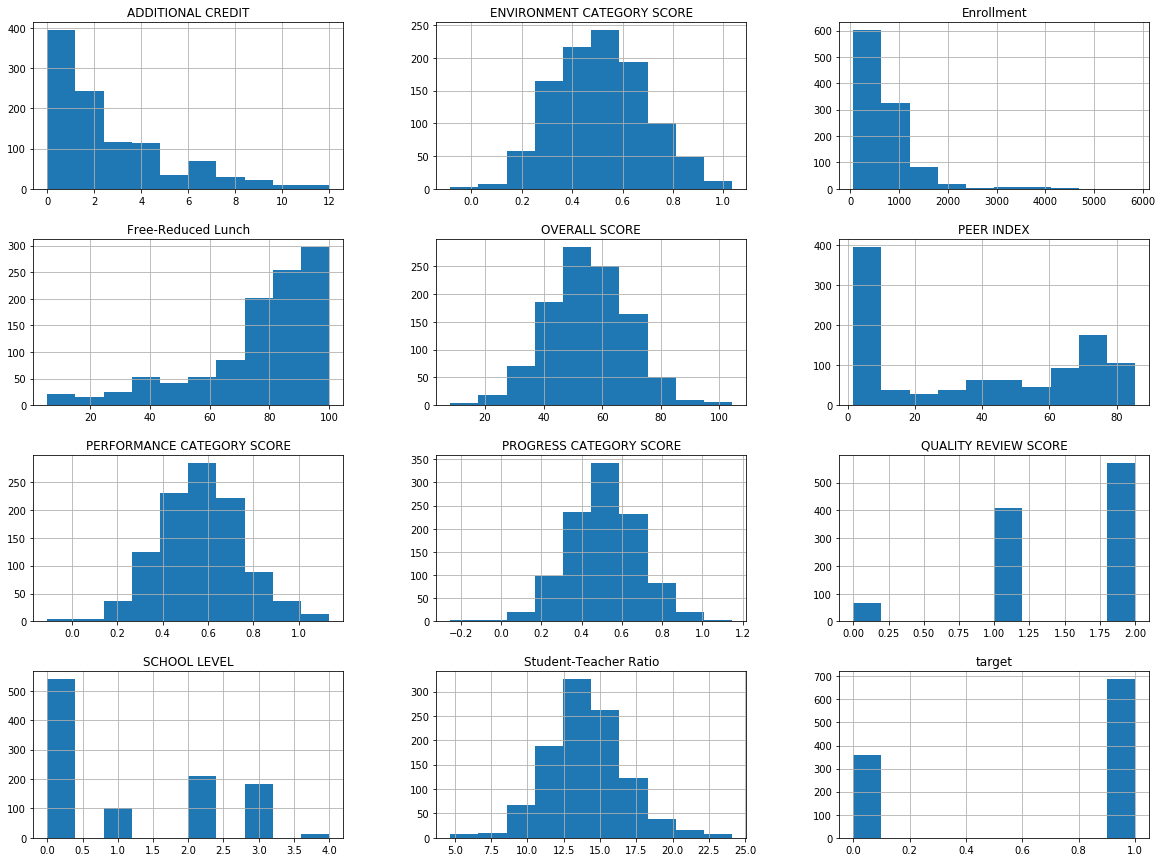

In [16]:
school_report.hist(figsize=(20,15));

#### Outliers

- What is meaningful here is that, in order for a school to get a quality review of "Proficient" doesn't neccessarily mean that they're scores will be higher.  A proficient score averages a score that is less than a well developed school, though well developed is not the highest quality review score available.  
- This also shows the outliers in the two (well-developed and proficient) while undeveloped scores between the range of the other two.

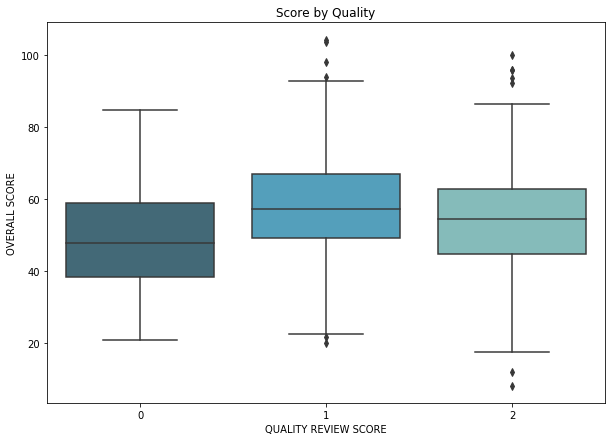

In [17]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'QUALITY REVIEW SCORE', y = 'OVERALL SCORE', 
            data = school_report, palette = 'GnBu_d').set_title('Score by Quality')
plt.show()

#### Countplot
- Most of the data collected come from elementry schools. 
- Barely no information on transfer schools.

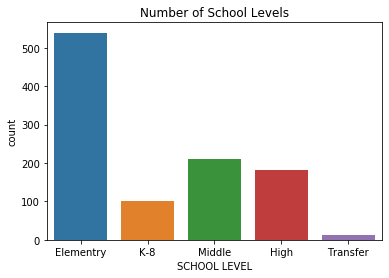

In [18]:
sns.countplot(x='SCHOOL LEVEL', data=school_report)
positions = (0, 1, 2, 3, 4)
labels = ('Elementry', 'K-8', 'Middle', 'High', 'Transfer')
plt.xticks(positions, labels);
plt.title('Number of School Levels');

#### Countplot
- Looking at the amount of each target that is in the dataset.
    - This shows that there is an imbalance between the different classes in the dataset. 

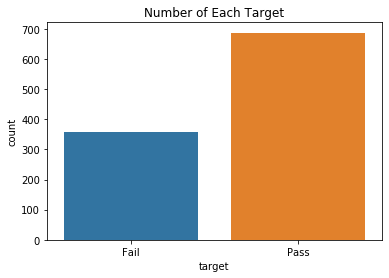

In [19]:
sns.countplot(x='target', data=school_report)
positions = (0, 1)
labels = ('Fail', 'Pass')
plt.xticks(positions, labels);
plt.title('Number of Each Target');

# Compare Models

#### SMOTE:
Since there was an imbalance between the classes, the method SMOTE can be used to help with the imbalance.  
   - SMOTE stands for Synthetic Minority Oversampling. Rather then oversampling the minority class with replacement (which simply adds duplicate cases to the dataset), the algorithm generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases. 

#### Splitting the data:
1. Separate the data into it's features (X) and the the target (y).
2. Create training and test sets.  
    - ```test_size = .20``` is a fair split where 80% of the data is training the set and 20% is the testing set.
    - Use a ```random_state = 6 ``` to get the same result if trying this project out.
3. Normalize the data by using ```StandardScaler``` to make sure that all of the data is represented in the same scale.
4. Convert the train data into a DataFrame to view the scaled data - notice how the scaler also scaled the encoded columns, this does not have a negative effect on the model, because each value has been replaced with a corresponding decimal value, but it still only contains those 3 or 4 values.  The overall information content of each column has not changed.

In [20]:
X = school_report.drop(['target'], axis = 1)
y = school_report['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 6)

In [22]:
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

1    687
0    357
Name: target, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    554
0    554
dtype: int64


In [23]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_resampled)
scaled_X_test = scaler.transform(X_test)

In [24]:
scaled_df_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_df_train.head()

,SCHOOL LEVEL,PEER INDEX,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,QUALITY REVIEW SCORE,Enrollment,Student-Teacher Ratio,Free-Reduced Lunch
0,-0.843756,0.428988,0.409503,-0.188022,-0.152232,0.384135,1.282216,-0.855969,-0.237803,-0.243692,-1.951856
1,0.815539,-1.129071,0.282434,-1.129738,0.263578,0.305259,0.971641,-0.855969,-0.460658,-0.399310,1.027400
2,-0.843756,1.332996,-1.043021,-0.288709,0.115481,-1.232835,-0.891809,-2.554941,-0.533662,0.417682,0.949256
3,-0.014108,0.195375,0.514663,-1.029051,-0.214889,0.632033,1.903367,0.843003,-0.675828,-2.928094,-0.608749
4,-0.843756,1.075669,0.239348,-0.697378,1.340128,-0.291950,0.350491,0.843003,0.096479,-0.049170,-1.102035


## 1. KNN (K-Nearest Neigbhors) model
   - K-NN algorithm is a classification algorithm that uses nearby points in order to generate a prediction.   It classifies new cases based on a similarity measure using distance metrics.  The idea is that objects that are more alike are more likely to be the same class, the smaller the distance between two points, the more similar they are.  By treating each column in the dataset as a separate dimension and plotting them, the distance between them  can be measured.  KNN takes a point that needs a class prediction for and finds the distance between that point and all the points that fall into that distance(K-nearest points).  Then, it votes on the points and the higher number of classes win.

#### What to do?

1. Instantiate KNeighborsClassifer
2. Fit the classifier 
    - (```scaled _X_train```, ```y_train```)
3. Predict on the test set
    - ```scaled_X_test```
4. Plot the confusion matrix: The diagonal represents where the predicted label is equal to the true label.  The off-diagonal elements are those that are mislabled by the classifier.  The higher the diagonal values of the matrix the better, indicating many correct perdictions.

In [25]:
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(scaled_X_train, y_train_resampled)
KNN_preds = KNN_clf.predict(scaled_X_test)

In [26]:
print_metrics(y_test, KNN_preds)

Precision Score: 0.914518051922632
Recall Score: 0.9138755980861244
Accuracy Score: 0.9138755980861244
F1 Score: 0.9141086186540732


- Precision Score is .9049 which says that the ratio of not labeling negatives as positives is 90%.
- Recall Score is .9043 which says that the ratio of having all positives is 90%.
- Accurary Score is .9043 which says that the percent of correct predictions is 90%.
- F1 score is .9045 which says that the average of precision and recall is 90%.

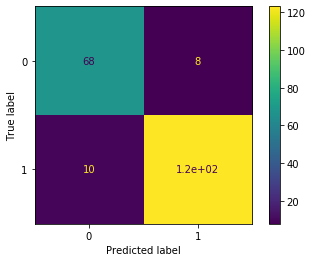

In [27]:
plot_confusion_matrix(KNN_clf, scaled_X_test, y_test);

- The confusion matrix shows that there are still a few elements that are mislabeled in this model.

#### Improve the model, if possible.

In [28]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0
    for i in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        f1_scores = f1_score(y_test, predictions, average='weighted')
        if f1_scores > best_score:
            best_score = f1_scores
            best_k = i
        print('Best Value for k:', best_k)
        print('F1 score achieved:', best_score)

In [29]:
find_best_k(scaled_X_train, y_train_resampled, scaled_X_test, y_test)

Best Value for k: 1
F1 score achieved: 0.885478158205431
Best Value for k: 3
F1 score achieved: 0.9048025765583018
Best Value for k: 5
F1 score achieved: 0.9141086186540732
Best Value for k: 7
F1 score achieved: 0.9333618035908111
Best Value for k: 7
F1 score achieved: 0.9333618035908111
Best Value for k: 7
F1 score achieved: 0.9333618035908111
Best Value for k: 7
F1 score achieved: 0.9333618035908111
Best Value for k: 7
F1 score achieved: 0.9333618035908111
Best Value for k: 7
F1 score achieved: 0.9333618035908111
Best Value for k: 7
F1 score achieved: 0.9333618035908111
Best Value for k: 7
F1 score achieved: 0.9333618035908111
Best Value for k: 7
F1 score achieved: 0.9333618035908111
Best Value for k: 7
F1 score achieved: 0.9333618035908111


- The best value for k that will give a better F1 score, is 9 with an F1 score of 93%.

- Run the KNN model again with the best k of 9, shows an improved Accuracy Score by 3%.

In [30]:
KNN_clf_improved = KNeighborsClassifier(n_neighbors = 9)
KNN_clf_improved.fit(scaled_X_train, y_train_resampled)
KNN_preds_improved = KNN_clf_improved.predict(scaled_X_test)

In [31]:
print_metrics(y_test, KNN_preds_improved)

Precision Score: 0.9201086302617784
Recall Score: 0.9138755980861244
Accuracy Score: 0.9138755980861244
F1 Score: 0.9148516414141414


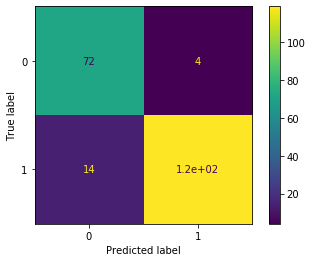

In [32]:
plot_confusion_matrix(KNN_clf_improved, scaled_X_test, y_test);

### KNN: Data for Dataframe

#### KNN Training Info from improved model

In [33]:
KNN_f1_train = round(f1_score(y_train_resampled, KNN_clf_improved.predict(scaled_X_train))*100, 2)
print('Train F1 score:', KNN_f1_train)
KNN_acc_train = round(accuracy_score(y_train_resampled, KNN_clf_improved.predict(scaled_X_train))*100, 2)
print('Train Accuracy Score:', KNN_acc_train)
KNN_prec_train = round(precision_score(y_train_resampled, KNN_clf_improved.predict(scaled_X_train))*100, 2)
print('Train Precision Score:', KNN_prec_train)

Train F1 score: 95.35
Train Accuracy Score: 95.49
Train Precision Score: 98.28


#### KNN Test Info from improved model

In [34]:
KNN_f1_test = round(f1_score(y_test, KNN_preds_improved)*100, 2)
print('Test F1 score:', KNN_f1_test)
KNN_acc_test = round(accuracy_score(y_test, KNN_preds_improved)*100, 2)
print('Test Accuracy Score:', KNN_acc_test)
KNN_prec_test = round(precision_score(y_test, KNN_preds_improved)*100, 2)
print('Test Precision Score:', KNN_prec_test)

Test F1 score: 92.97
Test Accuracy Score: 91.39
Test Precision Score: 96.75


## 2. Decision Tree Model
   - A decision tree is a DAG type of classifier where each internal node represents a choice between a number of alternatives and each leaf node represents a classification. An unknown (or test) instance is routed down the tree according to the values of the attributes in the successive nodes. When the instance reaches a leaf, it is classified according to the label assigned to the corresponded leaf.


#### What to do?

1. Instantiate DecisionTreeClassifier with ```random_state = 6``` to keep it the same.
2. Fit the classifier 
    - (```scaled _X_train```, ```y_train```)
3. Predict on the test set
    - ```scaled_X_test```
4. Possibility: Can make a plot the DOT data graph.
5. Check predictive performance.
6. Plot the confusion matrix: The diagonal represents where the predicted label is equal to the true label.  The off-diagonal elements are those that are mislabled by the classifier.  The higher the diagonal values of the matrix the better, indicating many correct perdictions.

In [35]:
dt_clf = DecisionTreeClassifier(random_state = 6)
dt_clf.fit(scaled_X_train, y_train_resampled)
dt_preds = dt_clf.predict(scaled_X_test)

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.981203007518797

In [37]:
print_metrics(y_test, dt_preds)

Precision Score: 0.9775533108866442
Recall Score: 0.9760765550239234
Accuracy Score: 0.9760765550239234
F1 Score: 0.9762283498281741


- Precision Score is .986 which says that the ratio of not labeling negatives as positives is 99%.
- Recall Score is .986 which says that the ratio of having all positives is 99%.
- Accurary Score is .986 which says that the percent of correct predictions is 99%.
- F1 score is .986 which says that the average of precision and recall is 99%.

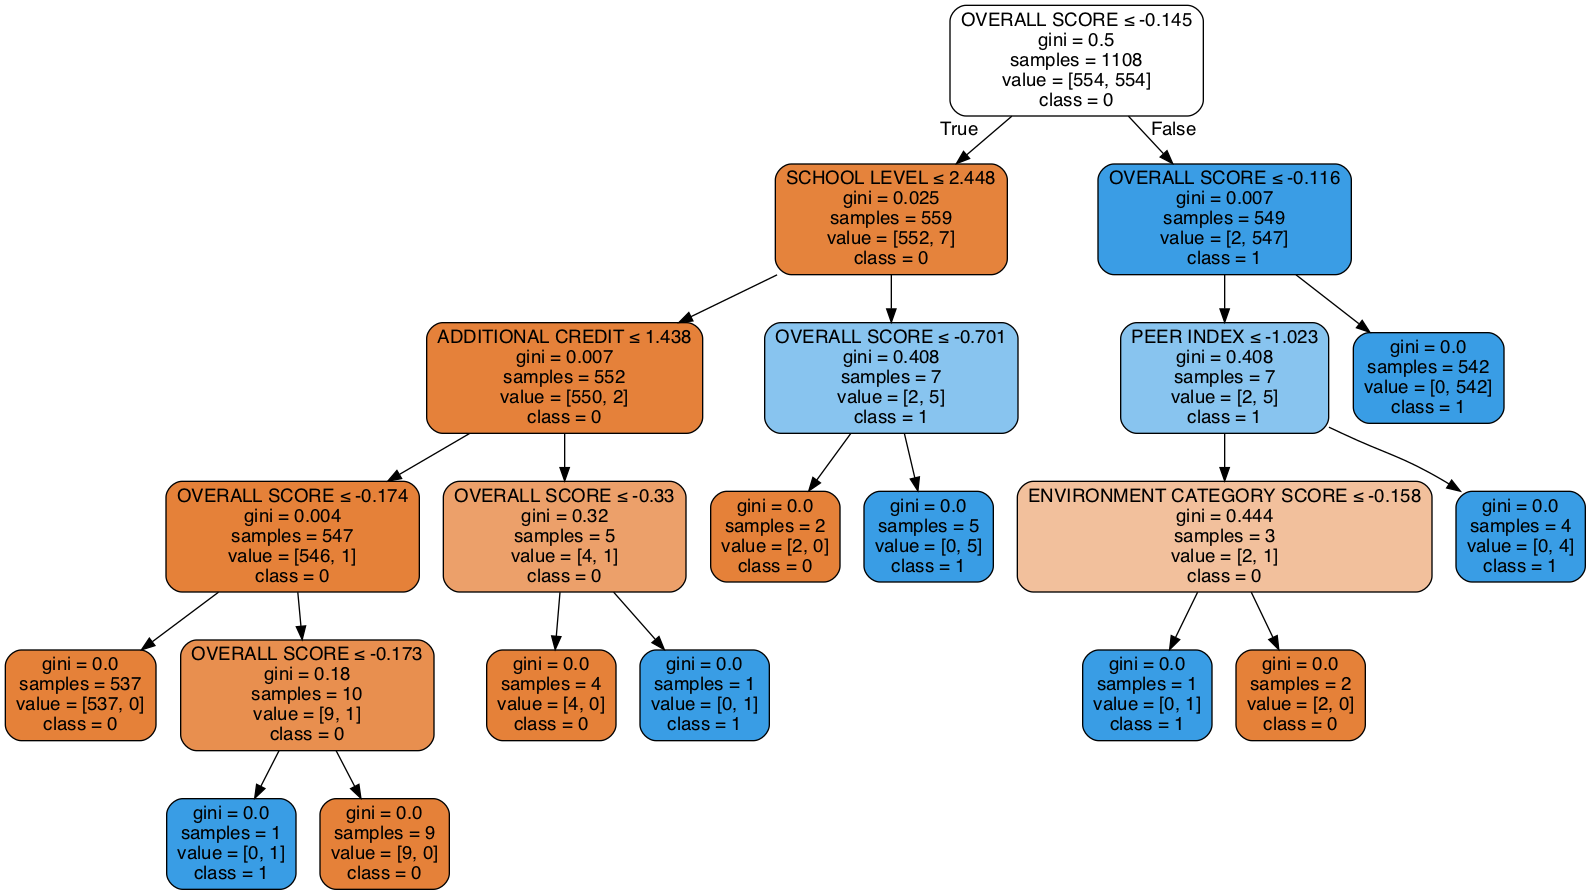

In [38]:
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=scaled_df_train.columns,
                          class_names=np.unique(y).astype('str'), filled=True, rounded=True, 
                           special_characters=True)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

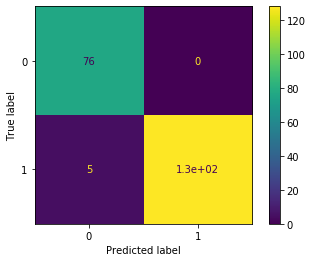

In [39]:
plot_confusion_matrix(dt_clf, scaled_X_test, y_test);

#### Hyperparameter Tuning the model

In [40]:
param_grid={'max_depth':range(1,32) ,
            'max_features': range(1,11),
            'criterion': ['gini', 'entropy'],
            'min_samples_split': range(2, 5) ,
            'min_samples_leaf': range(1, 2, 5)}
dt_grid = DecisionTreeClassifier(random_state = 6)
dt_gsv = GridSearchCV(dt_grid, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1)
dt_gsv.fit(scaled_X_train, y_train_resampled)

print("Best parameters:", dt_gsv.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [41]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=9,
                           max_depth=4,
                           min_samples_split=2,
                           min_samples_leaf=1, 
                           random_state=6)
dt.fit(scaled_X_train, y_train_resampled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,  dt.predict(scaled_X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9661654135338346

#### The original model was better fit for this data using the parameters:

In [42]:
dt_clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')>

### dt: Data for Dataframe

#### Decision Tree Training Info without hyperparameter tuning

In [43]:
dt_f1_train = round(f1_score(y_train_resampled, dt_clf.predict(scaled_X_train))*100, 2)
print('Train F1 score:', dt_f1_train)
dt_acc_train = round(accuracy_score(y_train_resampled, dt_clf.predict(scaled_X_train))*100, 2)
print('Train Accuracy Score:', dt_acc_train)
dt_prec_train = round(precision_score(y_train_resampled, dt_clf.predict(scaled_X_train))*100, 2)
print('Train Precision Score:', dt_prec_train)

Train F1 score: 100.0
Train Accuracy Score: 100.0
Train Precision Score: 100.0


#### Decision Tree Test Info without hyperparameter tuning

In [44]:
dt_f1_test = round(f1_score(y_test, dt_preds)*100, 2)
print('Test F1 score:', dt_f1_test)
dt_acc_test = round(accuracy_score(y_test, dt_preds)*100, 2)
print('Test Accuracy Score:', dt_acc_test)
dt_prec_test = round(precision_score(y_test, dt_preds)*100, 2)
print('Train Precision Score:', dt_prec_test)

Test F1 score: 98.08
Test Accuracy Score: 97.61
Train Precision Score: 100.0


## 3. Random Forest
   - Random Forest is an ensemble method (bringing together multiple models) for decision trees that takes advantage of bagging (obtain a portion of the data by sampling with replacement) and the subspace sampling (randomly select a subset of features to use as predictors for each node when training a decision tree, instead of using all predictors available at each node) method to create a "forest" of decision trees.  The random forest algorithm does not search for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

#### What to do?
1. Instantiate RandomForestClassifier with ```random_state = 6```.
2. Fit the classifier
    - (```scaled X_train```, ```y_train_resampled```)
3. Predict on the test set
    - ```scaled_X_test```
4. Check predictive performance. Use the model to predict labels on both the training and test set.
5. Calculate the percision, recall, accuracy and f1-score.
6. Plot the confusion matrix: The diagonal represents where the predicted label is equal to the true label. The off-diagonal elements are those that are mislabled by the classifier. The higher the diagonal values of the matrix the better, indicating many correct perdictions.

In [45]:
random_clf = RandomForestClassifier(random_state = 6)
random_clf.fit(scaled_X_train, y_train_resampled)
random_preds = random_clf.predict(scaled_X_test)

In [46]:
print_metrics(y_test, random_preds)

Precision Score: 0.9733924611973392
Recall Score: 0.9712918660287081
Accuracy Score: 0.9712918660287081
F1 Score: 0.971505709480393


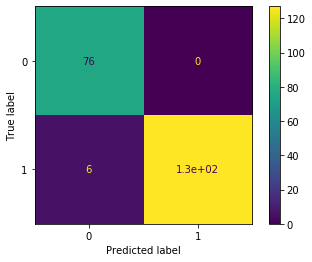

In [47]:
plot_confusion_matrix(random_clf, scaled_X_test, y_test);

### Random: Data for Dataframe

#### Random Forest Training Info 

In [48]:
random_f1_train = round(f1_score(y_train_resampled, random_clf.predict(scaled_X_train))*100, 2)
print('Train F1 score:', random_f1_train)
random_acc_train = round(accuracy_score(y_train_resampled, random_clf.predict(scaled_X_train))*100, 2)
print('Train Accuracy Score:', random_acc_train)
random_prec_train = round(precision_score(y_train_resampled, random_clf.predict(scaled_X_train))*100, 2)
print('Train Precision Score:', random_prec_train)

Train F1 score: 100.0
Train Accuracy Score: 100.0
Train Precision Score: 100.0


#### Random Forest Test Info 

In [49]:
random_f1_test = round(f1_score(y_test, random_preds)*100, 2)
print('Test F1 score:', random_f1_test)
random_acc_test = round(accuracy_score(y_test, random_preds)*100, 2)
print('Test Accuracy Score:', random_acc_test)
random_prec_test = round(precision_score(y_test, random_preds)*100, 2)
print('Train Precision Score:', random_prec_test)

Test F1 score: 97.69
Test Accuracy Score: 97.13
Train Precision Score: 100.0


## 4. Gradient Boosting
   - Gradient boosting takes a sequential approach for getting predictions by predicting the error from previous trees. 

#### What to do?

1. Instantiate GradientBoostingClassifier with ```random_state = 6``` to keep it the same.
2. Fit the classifier 
    - (scaled _X_train, y_train_resampled)
3. Predict on the test set
    - scaled_X_test
4. Check predictive performance.  Use the model to predict labels on both the training and test set.
5. Calculate the accuracy and f1-score for each model.
6. Plot the confusion matrix: The diagonal represents where the predicted label is equal to the true label.  The off-diagonal elements are those that are mislabled by the classifier.  The higher the diagonal values of the matrix the better, indicating many correct perdictions.

In [50]:
gbt_clf = GradientBoostingClassifier(random_state = 6)
gbt_clf.fit(scaled_X_train, y_train_resampled)
gbt_preds = gbt_clf.predict(scaled_X_test)

In [51]:
print_metrics(y_test, gbt_preds)

Precision Score: 0.9775533108866442
Recall Score: 0.9760765550239234
Accuracy Score: 0.9760765550239234
F1 Score: 0.9762283498281741


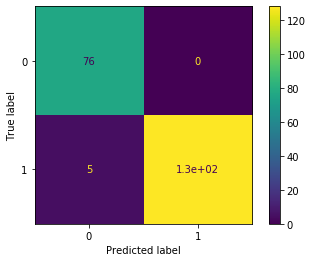

In [52]:
plot_confusion_matrix(gbt_clf, scaled_X_test, y_test);

### GBT: Data for Dataframe 

#### Gradient Boosting Training Info 

In [53]:
gbt_f1_train = round(f1_score(y_train_resampled, gbt_clf.predict(scaled_X_train))*100, 2)
print('Train F1 score:', gbt_f1_train)
gbt_acc_train = round(accuracy_score(y_train_resampled, gbt_clf.predict(scaled_X_train))*100, 2)
print('Train Accuracy Score:', gbt_acc_train)
gbt_prec_train = round(precision_score(y_train_resampled, gbt_clf.predict(scaled_X_train))*100, 2)
print('Train Precision Score:', gbt_prec_train)

Train F1 score: 100.0
Train Accuracy Score: 100.0
Train Precision Score: 100.0


#### Gradient Boosting Test Info 

In [54]:
gbt_f1_test = round(f1_score(y_test, gbt_preds)*100, 2)
print('Test F1 score:', gbt_f1_test)
gbt_acc_test = round(accuracy_score(y_test, gbt_preds)*100, 2)
print('Test Accuracy Score:', gbt_acc_test)
gbt_prec_test = round(precision_score(y_test, gbt_preds)*100, 2)
print('Train Precision Score:', gbt_prec_test)

Test F1 score: 98.08
Test Accuracy Score: 97.61
Train Precision Score: 100.0


## 5. Adaboost (Adapative Boosting)
   -  Adaboost creates new classifiers by continually influencing the distribution of the data sampled to train each successive learner.  Weak leaners are trained on a subsample of the data.  As the learners learn, it uses the information gained from previous learners, to train the next learner. 

#### What to do?

1. Instantiate AdaBoostClassifier with ```random_state = 6``` to keep it the same.
2. Fit the classifier 
    - (```scaled _X_train```, ```y_train_resampled```)
3. Predict on the test set
    - ```scaled_X_test```
4. Check predictive performance.  Use the model to predict labels on both the training and test set.
5. Calculate the percision, recall, accuracy and f1-score.
6. Plot the confusion matrix: The diagonal represents where the predicted label is equal to the true label.  The off-diagonal elements are those that are mislabled by the classifier.  The higher the diagonal values of the matrix the better, indicating many correct perdictions.

In [55]:
adaboost_clf = AdaBoostClassifier(random_state = 6)
adaboost_clf.fit(scaled_X_train, y_train_resampled)
adaboost_preds = adaboost_clf.predict(scaled_X_test)

In [56]:
print_metrics(y_test, adaboost_preds)

Precision Score: 0.9766929273258387
Recall Score: 0.9760765550239234
Accuracy Score: 0.9760765550239234
F1 Score: 0.9761716267297034


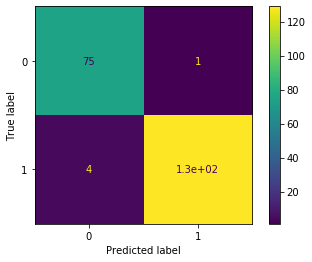

In [57]:
plot_confusion_matrix(adaboost_clf, scaled_X_test, y_test);

### Ada: Data for Dataframe

#### AdaBoost Training Info 

In [58]:
adaboost_f1_train = round(f1_score(y_train_resampled, adaboost_clf.predict(scaled_X_train))*100, 2)
print('Train F1 score:', adaboost_f1_train)
adaboost_acc_train = round(accuracy_score(y_train_resampled, adaboost_clf.predict(scaled_X_train))*100, 2)
print('Train Accuracy Score:', adaboost_acc_train)
adaboost_prec_train = round(precision_score(y_train_resampled, adaboost_clf.predict(scaled_X_train))*100, 2)
print('Train Precision Score:', adaboost_prec_train)

Train F1 score: 100.0
Train Accuracy Score: 100.0
Train Precision Score: 100.0


#### AdaBoost Test Info 

In [59]:
adaboost_f1_test = round(f1_score(y_test, adaboost_preds)*100, 2)
print('Test F1 score:', adaboost_f1_test)
adaboost_acc_test = round(accuracy_score(y_test, adaboost_preds)*100, 2)
print('Test Accuracy Score:', adaboost_acc_test)
adaboost_prec_test = round(precision_score(y_test, adaboost_preds)*100, 2)
print('Train Precision Score:', adaboost_prec_test)

Test F1 score: 98.1
Test Accuracy Score: 97.61
Train Precision Score: 99.23


## 6. XGBoost (eXtreme Gradient Boosting)
- XGBoost provides a parallel tree boosting. 

1. Instantiate XGBClassifier with ```random_state = 6``` to keep it the same.
2. Fit the classifier 
    - (scaled _X_train, y_train_resampled)
3. Predict on the test set
    - scaled_X_test
4. Check predictive performance.  Use the model to predict labels on both the training and test set.
5. Calculate the percision, recall, accuracy and f1-score.
6. Plot the confusion matrix: The diagonal represents where the predicted label is equal to the true label.  The off-diagonal elements are those that are mislabled by the classifier.  The higher the diagonal values of the matrix the better, indicating many correct perdictions.

In [60]:
xgboost_clf = XGBClassifier(random_state = 6)
xgboost_clf.fit(scaled_X_train, y_train_resampled)
xgboost_preds = xgboost_clf.predict(scaled_X_test)

In [61]:
print_metrics(y_test, xgboost_preds)

Precision Score: 0.9811562483318208
Recall Score: 0.9808612440191388
Accuracy Score: 0.9808612440191388
F1 Score: 0.9809130263675717


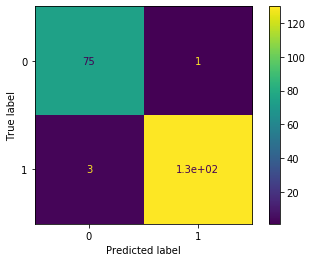

In [62]:
plot_confusion_matrix(xgboost_clf, scaled_X_test, y_test);

### XGBoost: Data for Dataframe

#### XGBoost Training Info 

In [63]:
xgboost_f1_train = round(f1_score(y_train_resampled, xgboost_clf.predict(scaled_X_train))*100, 2)
print('Train F1 score:', xgboost_f1_train)
xgboost_acc_train = round(accuracy_score(y_train_resampled, xgboost_clf.predict(scaled_X_train))*100, 2)
print('Train Accuracy Score:', xgboost_acc_train)
xgboost_prec_train = round(precision_score(y_train_resampled, xgboost_clf.predict(scaled_X_train))*100, 2)
print('Train Precision Score:', xgboost_prec_train)

Train F1 score: 100.0
Train Accuracy Score: 100.0
Train Precision Score: 100.0


#### XGBoost Test Info 

In [64]:
xgboost_f1_test = round(f1_score(y_test, xgboost_preds)*100, 2)
print('Test F1 score:', xgboost_f1_test)
xgboost_acc_test = round(accuracy_score(y_test, xgboost_preds)*100, 2)
print('Test Accuracy Score:', xgboost_acc_test)
xgboost_prec_test = round(precision_score(y_test, xgboost_preds)*100, 2)
print('Train Precision Score:', xgboost_prec_test)

Test F1 score: 98.48
Test Accuracy Score: 98.09
Train Precision Score: 99.24


# DataFrame of all the models with their scores

In [65]:
data = {'Model': ['KNN', 'Decision Tree', 'Random Forest', 'Gadrient Boosting', 'AdaBoost', 'XGBoost'],
         'Train Accuracy Score': [KNN_acc_train, dt_acc_train, random_acc_train, gbt_acc_train, adaboost_acc_train, 
                                  xgboost_acc_train],
         'Train F1 Score': [KNN_f1_train, dt_f1_train, random_f1_train, gbt_f1_train, adaboost_f1_train, xgboost_f1_train],
         'Test Accuracy Score': [KNN_acc_test, dt_acc_test, random_acc_test, gbt_acc_test, adaboost_acc_test, 
                                  xgboost_acc_test],
         'Test F1 Score': [KNN_f1_test, dt_f1_test, random_f1_test, gbt_f1_test, adaboost_f1_test, xgboost_f1_test]}
model_performance = pd.DataFrame(data)
model_performance.sort_values(by='Test Accuracy Score', ascending=False)

,Model,Train Accuracy Score,Train F1 Score,Test Accuracy Score,Test F1 Score
5,XGBoost,100.00,100.00,98.09,98.48
1,Decision Tree,100.00,100.00,97.61,98.08
3,Gadrient Boosting,100.00,100.00,97.61,98.08
4,AdaBoost,100.00,100.00,97.61,98.10
2,Random Forest,100.00,100.00,97.13,97.69
0,KNN,95.49,95.35,91.39,92.97


#### The importance of Feature Importance:
- The decision tree model shows that the OVERALL SCORE was the most useful in the construction of the model, followed by SCHOOL LEVEL, PEER INDEX, and ENVIRONMENT CATEGORY SCORE.  The rest of the features played no part in making the Decision Tree model, that scored the highest accuracy score of all the models.
- The XGBoost model did not use Student-Teacher Ratio in the construction of the model, and heavily depended on OVERALL SCORE in it's construction.
- The other models (Random Forest, Gradiant Boost, and AdaBoost, all used parts of all features to construct their models -- Using OVERALL SCORE as their main contributor.
- The best models to use to help model future input are: Random Forest or AdaBoost, because they use more of their features to make decisions.


In [66]:
feature_df = pd.DataFrame()
feature_df['Feature'] = school_report.drop('target',axis=1).columns
feature_df['Decision Tree'] = dt_clf.feature_importances_
feature_df['Random Forest'] = random_clf.feature_importances_
feature_df['Gradient Boost'] = gbt_clf.feature_importances_
feature_df['AdaBoost'] = adaboost_clf.feature_importances_
feature_df['XGBoost'] = xgboost_clf.feature_importances_
feature_df

,Feature,Decision Tree,Random Forest,Gradient Boost,AdaBoost,XGBoost
0,SCHOOL LEVEL,0.012603,0.009370,1.328636e-02,0.24,0.042740
1,PEER INDEX,0.002751,0.009745,6.239144e-04,0.04,0.009667
2,OVERALL SCORE,0.981537,0.541709,9.823390e-01,0.24,0.886153
3,ENVIRONMENT CATEGORY SCORE,0.002407,0.036756,1.200288e-04,0.04,0.004024
4,PERFORMANCE CATEGORY SCORE,0.000000,0.073268,2.450652e-04,0.02,0.008019
5,PROGRESS CATEGORY SCORE,0.000000,0.255478,1.567591e-03,0.08,0.007616
6,ADDITIONAL CREDIT,0.000702,0.045921,1.011957e-03,0.00,0.003104
7,QUALITY REVIEW SCORE,0.000000,0.005132,4.795710e-08,0.06,0.010486
8,Enrollment,0.000000,0.008612,4.718239e-04,0.04,0.016349
9,Student-Teacher Ratio,0.000000,0.007158,1.194404e-04,0.08,0.008230


# Testing the Model with 2007-2008 Data

In [67]:
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'AdaBoost', 'XGBoost']
models = [KNN_clf_improved, dt_clf, random_clf, gbt_clf, adaboost_clf, xgboost_clf]

In [68]:
new_data = pd.read_csv('2007-2008_Sample_Data.csv')

In [69]:
new_data

,Unnamed: 0,SCHOOL,SCHOOL LEVEL,PEER INDEX,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,2007-08 QUALITY REVIEW SCORE,Enrollment,Student-Teacher Ratio,Free-Reduced Lunch,Pass/Fail
0,0,BARD HIGH SCHOOL EARLY COLLEGE,3,3.79,57.8,10.9,15.9,31.0,0.00,2,614,4.9,44,1
1,1,P.S. 140 NATHAN STRAUS,1,62.46,64.8,9.0,15.3,36.0,4.50,2,318,9.2,72,1
2,2,EARTH SCHOOL,0,34.68,62.4,11.9,9.8,36.9,3.75,1,344,7.3,48,1
3,4,EAST SIDE COMMUNITY HIGH SCHOOL,3,2.27,68.3,13.0,19.9,33.4,2.00,1,675,6.4,67,1
4,6,MARTA VALLE SECONDARY SCHOOL,3,2.08,52.6,5.3,8.8,35.5,3.00,2,95,15.8,90,1
5,7,NEIGHBORHOOD SCHOOL,0,33.34,32.1,12.2,9.6,9.5,0.75,1,310,7.1,39,0
6,8,P.S. 015 ROBERTO CLEMENTE,0,63.28,31.9,5.8,8.0,18.1,0.00,2,190,11.0,83,0
7,9,P.S. 019 ASHER LEVY,0,50.39,50.8,9.0,11.4,30.4,0.00,1,241,15.4,75,1
8,10,P.S. 020 ANNA SILVER,0,57.37,69.7,9.7,20.0,37.7,2.25,1,476,7.7,56,1
9,11,P.S. 034 FRANKLIN D. ROOSEVELT,1,58.96,59.8,4.5,10.6,37.9,6.75,1,293,13.7,98,1


In [70]:
new_data_2008 = new_data.drop(['Unnamed: 0', 'SCHOOL'], axis=1)

In [71]:
new_data_2008

,SCHOOL LEVEL,PEER INDEX,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,2007-08 QUALITY REVIEW SCORE,Enrollment,Student-Teacher Ratio,Free-Reduced Lunch,Pass/Fail
0,3,3.79,57.8,10.9,15.9,31.0,0.00,2,614,4.9,44,1
1,1,62.46,64.8,9.0,15.3,36.0,4.50,2,318,9.2,72,1
2,0,34.68,62.4,11.9,9.8,36.9,3.75,1,344,7.3,48,1
3,3,2.27,68.3,13.0,19.9,33.4,2.00,1,675,6.4,67,1
4,3,2.08,52.6,5.3,8.8,35.5,3.00,2,95,15.8,90,1
5,0,33.34,32.1,12.2,9.6,9.5,0.75,1,310,7.1,39,0
6,0,63.28,31.9,5.8,8.0,18.1,0.00,2,190,11.0,83,0
7,0,50.39,50.8,9.0,11.4,30.4,0.00,1,241,15.4,75,1
8,0,57.37,69.7,9.7,20.0,37.7,2.25,1,476,7.7,56,1
9,1,58.96,59.8,4.5,10.6,37.9,6.75,1,293,13.7,98,1


In [72]:
scaler = StandardScaler()
X_new = scaler.fit_transform(new_data_2008.drop('Pass/Fail', axis=1))
y_new = new_data_2008['Pass/Fail']

In [74]:
d0 = scaler.transform(np.array([3, 3.79, 57.8, 10.9, 15.9, 31.0, 0.00, 2, 614, 4.9, 44]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d0)[0]==1 else 'No')

KNN
Yes
Decision Tree
Yes
Random Forest
Yes
Gradient Boost
Yes
AdaBoost
Yes
XGBoost
Yes


In [75]:
d1 = scaler.transform(np.array([1, 62.46, 64.8, 9.0, 15.3, 36.0, 4.50, 2, 318, 9.2, 72]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d1)[0]==1 else 'No')

KNN
Yes
Decision Tree
Yes
Random Forest
Yes
Gradient Boost
Yes
AdaBoost
Yes
XGBoost
Yes


In [76]:
d2 = scaler.transform(np.array([0, 34.68, 62.4, 11.9, 9.8, 36.9, 3.75, 1, 344, 7.3, 48]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d2)[0]==1 else 'No')

KNN
Yes
Decision Tree
Yes
Random Forest
Yes
Gradient Boost
Yes
AdaBoost
Yes
XGBoost
Yes


In [77]:
d3 = scaler.transform(np.array([3, 2.27, 68.3, 13.0, 19.9, 33.4, 2.00, 1, 675, 6.4, 67]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d3)[0]==1 else 'No')

KNN
Yes
Decision Tree
Yes
Random Forest
Yes
Gradient Boost
Yes
AdaBoost
Yes
XGBoost
Yes


In [78]:
d4 = scaler.transform(np.array([3, 2.08, 52.6, 5.3, 8.8, 35.5, 3.00, 2, 95, 15.8, 90]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d4)[0]==1 else 'No')

KNN
No
Decision Tree
Yes
Random Forest
Yes
Gradient Boost
Yes
AdaBoost
Yes
XGBoost
Yes


In [79]:
d5 = scaler.transform(np.array([0, 33.34, 32.1, 12.2, 9.6, 9.5, 0.75, 1, 310, 7.1, 39]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d5)[0]==1 else 'No')

KNN
No
Decision Tree
No
Random Forest
No
Gradient Boost
No
AdaBoost
No
XGBoost
No


In [80]:
d6 = scaler.transform(np.array([0, 63.28, 31.9, 5.8, 8.0, 18.1, 0.00, 2, 190, 11.0, 83]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d6)[0]==1 else 'No')

KNN
No
Decision Tree
No
Random Forest
No
Gradient Boost
No
AdaBoost
No
XGBoost
No


In [81]:
d7 = scaler.transform(np.array([0, 50.39, 50.8, 9.0, 11.4, 30.4, 0.00, 1, 241, 15.4, 75]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d7)[0]==1 else 'No')

KNN
No
Decision Tree
No
Random Forest
No
Gradient Boost
No
AdaBoost
No
XGBoost
No


In [82]:
d8 = scaler.transform(np.array([0, 57.37, 69.7, 9.7, 20.0, 37.7, 2.25, 1, 476, 7.7, 56]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d8)[0]==1 else 'No')

KNN
Yes
Decision Tree
Yes
Random Forest
Yes
Gradient Boost
Yes
AdaBoost
Yes
XGBoost
Yes


In [83]:
d9 = scaler.transform(np.array([1, 58.96, 59.8, 4.5, 10.6, 37.9, 6.75, 1, 293, 13.7, 98]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d9)[0]==1 else 'No')

KNN
Yes
Decision Tree
Yes
Random Forest
Yes
Gradient Boost
Yes
AdaBoost
Yes
XGBoost
Yes


In [84]:
d10 = scaler.transform(np.array([0, 53.00, 26.5, 7.6, 11.3, 7.6, 0.00, 2, 1859, 4.7, 73]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d10)[0]==1 else 'No')

KNN
No
Decision Tree
No
Random Forest
No
Gradient Boost
No
AdaBoost
No
XGBoost
No


In [85]:
d11 = scaler.transform(np.array([0, 60.63, 79.7, 12.1, 18.9, 46.4, 2.25, 1, 236, 11.9, 95]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d11)[0]==1 else 'No')

KNN
Yes
Decision Tree
Yes
Random Forest
Yes
Gradient Boost
Yes
AdaBoost
Yes
XGBoost
Yes


In [86]:
d12 = scaler.transform(np.array([0, 42.56, 41.2, 9.4, 16.9, 13.4, 1.50, 1, 396, 7.0, 56]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d12)[0]==1 else 'No')

KNN
No
Decision Tree
No
Random Forest
No
Gradient Boost
No
AdaBoost
No
XGBoost
No


In [87]:
d13 = scaler.transform(np.array([0, 54.03, 53.0, 5.8, 14.4, 31.3, 1.50, 2, 254, 14.9, 89]).reshape(1,-1))
for model, name in zip(models, model_names):
    print(name)
    print('Yes' if model.predict(d13)[0]==1 else 'No')

KNN
Yes
Decision Tree
Yes
Random Forest
Yes
Gradient Boost
Yes
AdaBoost
Yes
XGBoost
Yes


In [88]:
new_data['KNN Model Results'] = [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
new_data['Decision Tree Model Results'] = [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]
new_data['Random Forest Model Results'] = [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]
new_data['Gradient Boost Model Results'] = [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]
new_data['AdaBoost Model Results'] = [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]
new_data['XGBoost Model Results'] = [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]

In [89]:
new_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [90]:
new_data

,SCHOOL,SCHOOL LEVEL,PEER INDEX,OVERALL SCORE,ENVIRONMENT CATEGORY SCORE,PERFORMANCE CATEGORY SCORE,PROGRESS CATEGORY SCORE,ADDITIONAL CREDIT,2007-08 QUALITY REVIEW SCORE,Enrollment,Student-Teacher Ratio,Free-Reduced Lunch,Pass/Fail,KNN Model Results,Decision Tree Model Results,Random Forest Model Results,Gradient Boost Model Results,AdaBoost Model Results,XGBoost Model Results
0,BARD HIGH SCHOOL EARLY COLLEGE,3,3.79,57.8,10.9,15.9,31.0,0.00,2,614,4.9,44,1,1,1,1,1,1,1
1,P.S. 140 NATHAN STRAUS,1,62.46,64.8,9.0,15.3,36.0,4.50,2,318,9.2,72,1,1,1,1,1,1,1
2,EARTH SCHOOL,0,34.68,62.4,11.9,9.8,36.9,3.75,1,344,7.3,48,1,1,1,1,1,1,1
3,EAST SIDE COMMUNITY HIGH SCHOOL,3,2.27,68.3,13.0,19.9,33.4,2.00,1,675,6.4,67,1,1,1,1,1,1,1
4,MARTA VALLE SECONDARY SCHOOL,3,2.08,52.6,5.3,8.8,35.5,3.00,2,95,15.8,90,1,0,1,1,1,1,1
5,NEIGHBORHOOD SCHOOL,0,33.34,32.1,12.2,9.6,9.5,0.75,1,310,7.1,39,0,0,0,0,0,0,0
6,P.S. 015 ROBERTO CLEMENTE,0,63.28,31.9,5.8,8.0,18.1,0.00,2,190,11.0,83,0,0,0,0,0,0,0
7,P.S. 019 ASHER LEVY,0,50.39,50.8,9.0,11.4,30.4,0.00,1,241,15.4,75,1,0,0,0,0,0,0
8,P.S. 020 ANNA SILVER,0,57.37,69.7,9.7,20.0,37.7,2.25,1,476,7.7,56,1,1,1,1,1,1,1
9,P.S. 034 FRANKLIN D. ROOSEVELT,1,58.96,59.8,4.5,10.6,37.9,6.75,1,293,13.7,98,1,1,1,1,1,1,1


# Final Results

- After testing the models, the only model that showed any discrepancies, was the KNN model, showing a fail, when its true value was passing.  There was one school, where all the models showed it was a failing school, when in fact it had passed.
    - In conclusion, any of the models except for KNN could be a good model to use in order to predict if a school would pass or fail with the given features.

# Future Work

- Gather more information in order to add more features to the data that will help give a better overview of what is happening. 
    - Gather more information on other school levels in order to have more balance.
    - Important things to look for are state test scores, number of teachers, and school budget.
    - Other features that will help scoring a school is the percent of boys vs. girls, the percent of different ethnicities, and attendance rate for both teachers and students.
- Use the information gathered to see where schools flourish and use that in order to help with real-estate and businesses. 
- Use the information to help district allocate coaches and support to schools that need help in order to improve their scores.